In [3]:
import json, random

categories = ["Idea", "Meeting", "Study", "Work", "Personal", "Planning", "Question", "Tech"]

seed_prompts = {
    "Idea": ["Brainstorming AI startup", "New plant health app idea", "Thought on sustainable tech"],
    "Meeting": ["Team discussed deadlines", "Client feedback summary", "Meeting with mentor on next steps"],
    "Study": ["Learning CNNs and ViTs", "Notes on thermodynamics", "Studied French Revolution timeline"],
    "Work": ["Fixed bug in Flask route", "Completed frontend for dashboard", "Deployment issues resolved"],
    "Personal": ["Feeling productive today", "Reflected on last week's habits", "Grateful for quiet moments"],
    "Planning": ["Hackathon prep steps", "Roadmap for Q4 goals", "Weekend routine outline"],
    "Question": ["Why does my model overfit?", "How to boost productivity?", "What's the best loss function?"],
    "Tech": ["Exploring FastAPI", "Built a classifier with transformers", "Testing Whisper audio model"]
}

data = []
for cat in categories:
    for _ in range(95):  
        data.append({
            "text": random.choice(seed_prompts[cat]),
            "label": cat
        })

random.shuffle(data)

with open("note_classification_dataset.jsonl", "w") as f:
    for entry in data:
        f.write(json.dumps(entry) + "\n")


In [4]:
import numpy as np
import pandas as pd
with open("note_classification_dataset.jsonl", "r") as f:
    data = [json.loads(line.strip()) for line in f]

df = pd.DataFrame(data)

In [5]:
print("Sample entries:\n", df.head())
print("\nClass distribution:\n", df['label'].value_counts())

Sample entries:
                              text     label
0       New plant health app idea      Idea
1       New plant health app idea      Idea
2  What's the best loss function?  Question
3      Deployment issues resolved      Work
4          Learning CNNs and ViTs     Study

Class distribution:
 label
Idea        95
Question    95
Work        95
Study       95
Meeting     95
Tech        95
Planning    95
Personal    95
Name: count, dtype: int64


/Users/ayaanhussain/Library/Python/3.11/lib/python/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.stats import gaussian_kde


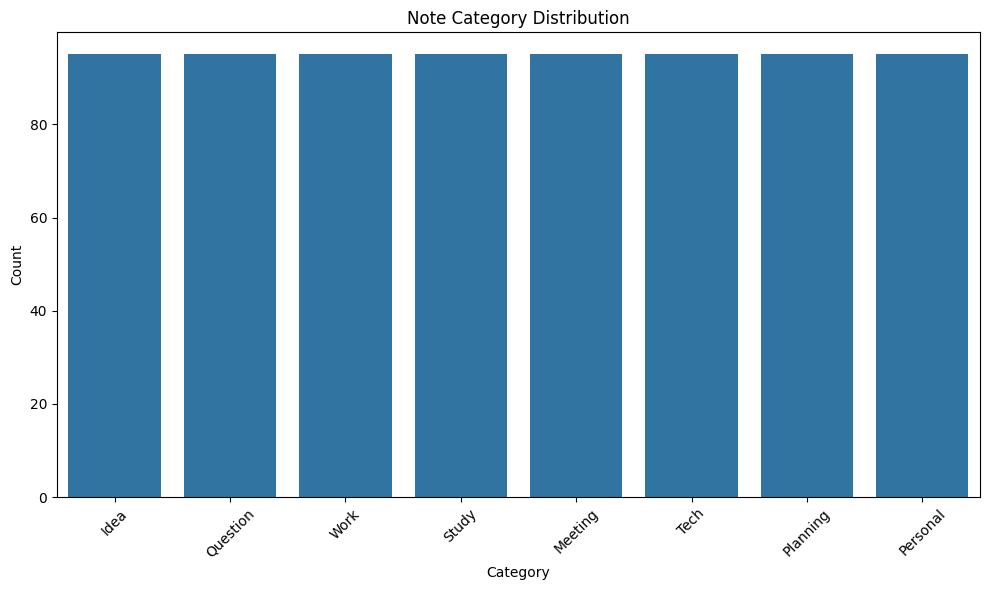

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.title("Note Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"],
    test_size=0.2, stratify=df["label"], random_state=42
)


In [8]:
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [10]:
y_pred = clf.predict(X_test_vec)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Idea       1.00      1.00      1.00        19
     Meeting       1.00      1.00      1.00        19
    Personal       1.00      1.00      1.00        19
    Planning       1.00      1.00      1.00        19
    Question       1.00      1.00      1.00        19
       Study       1.00      1.00      1.00        19
        Tech       1.00      1.00      1.00        19
        Work       1.00      1.00      1.00        19

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152



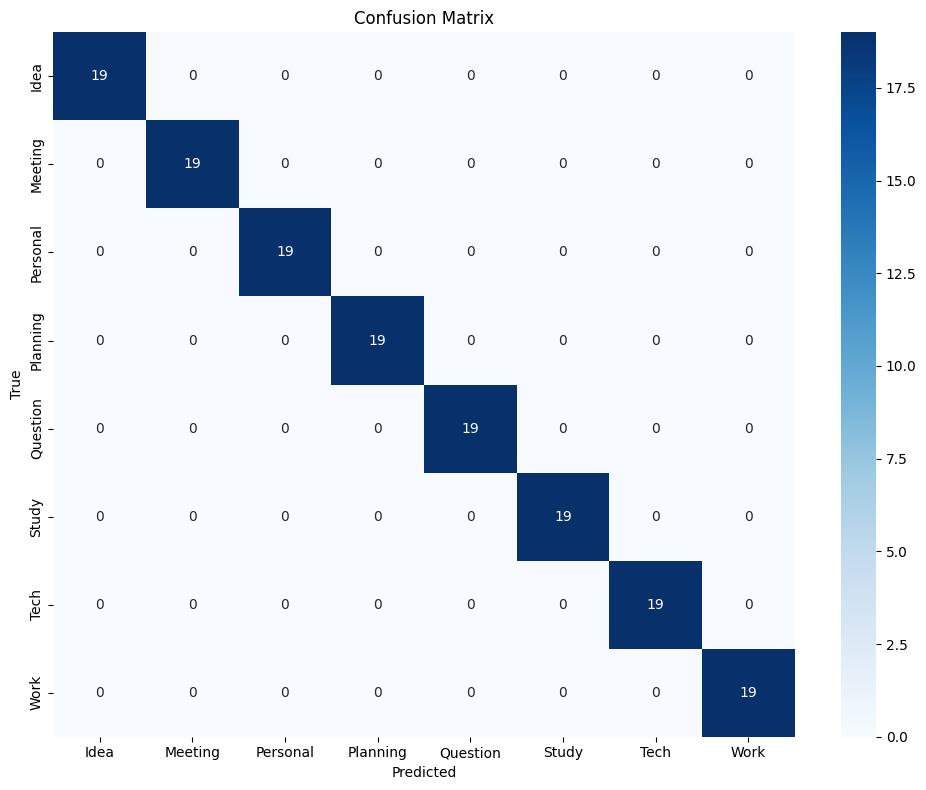

In [12]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [14]:
def classify_note(text, vectorizer, model):
    vec = vectorizer.transform([text])
    prediction = model.predict(vec)[0]
    proba = model.predict_proba(vec)[0]
    confidence = np.max(proba)
    return prediction, confidence

# 🔍 Example tests
test_notes = [
    "This discussion covers the importance of machine learning in your syllabus and focuses on starting with deep neural networks."
]

for note in test_notes:
    category, conf = classify_note(note, vectorizer, clf)
    print(f"📝: {note}\n➡️ Predicted: {category} ({conf*100:.1f}%)\n")


📝: This discussion covers the importance of machine learning in your syllabus and focuses on starting with deep neural networks.
➡️ Predicted: Study (32.6%)

